## Level 2 : Task 2: Time Series Analysis

In [1]:
#Importing Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Using the Flights dataset from Seaborn
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flights.shape

(144, 3)

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
#Fixing Data Inconsistencies and Plotting Time Series
flights['date'] = pd.to_datetime(flights['year'].astype(str) + "-" + flights['month'].astype(str))
flights.set_index('date', inplace=True)
ts = flights['passengers']

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_16084\666442976.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['date'] = pd.to_datetime(flights['year'].astype(str) + "-" + flights['month'].astype(str))


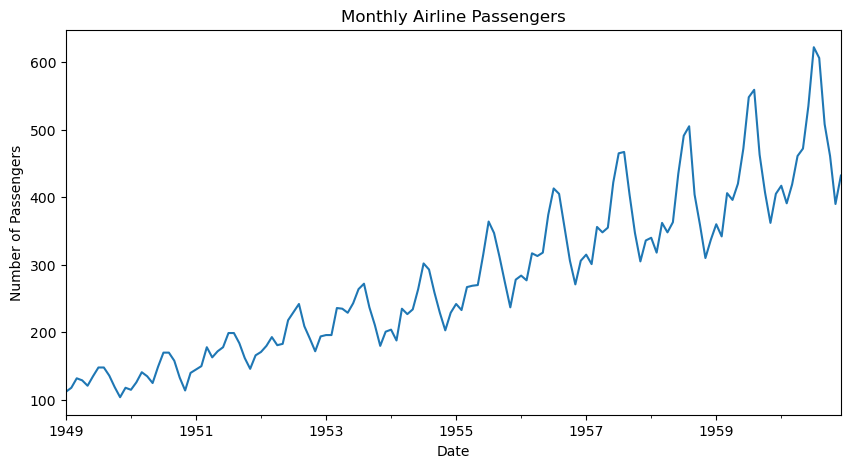

In [6]:
plt.figure(figsize=(10,5))
ts.plot()
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

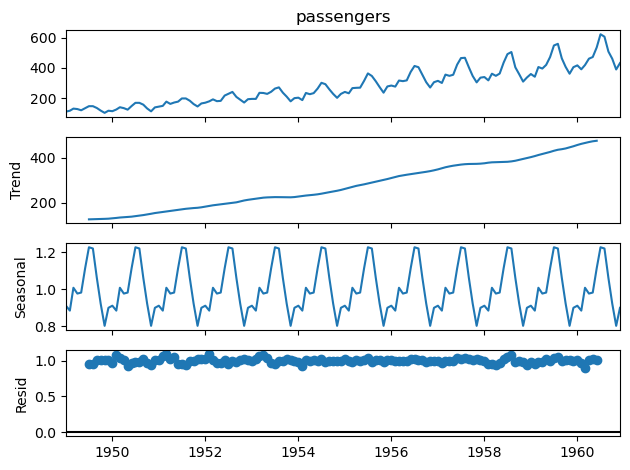

In [7]:
# Plotting (Time Series, Trend, Seasonality & Residual)
result = seasonal_decompose(ts, model='multiplicative')
result.plot()
plt.show()

In [8]:
# Creating Auto-Regressive Integrated Moving Average (ARIMA) Model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
forecast = model_fit.forecast(steps=12)
print(forecast)


1961-01-01    439.855314
1961-02-01    465.297241
1961-03-01    500.666670
1961-04-01    535.971621
1961-05-01    561.688716
1961-06-01    571.311700
1961-07-01    562.970771
1961-08-01    539.727739
1961-09-01    508.527168
1961-10-01    478.147204
1961-11-01    456.748176
1961-12-01    449.698609
Freq: MS, Name: predicted_mean, dtype: float64


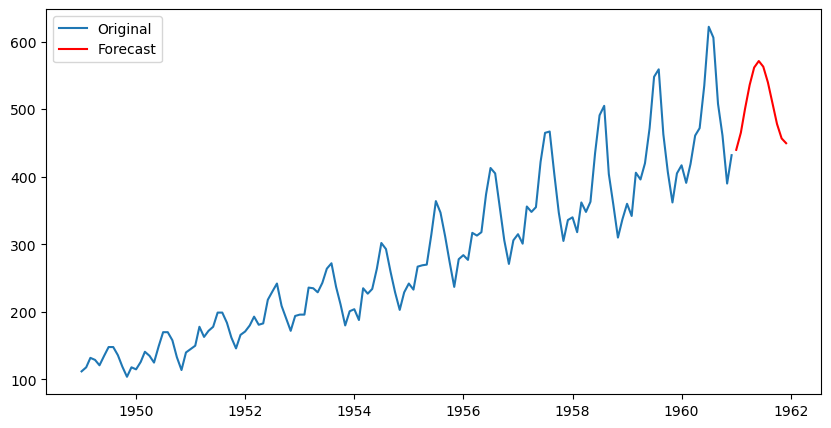

In [22]:
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()